In [4]:
import pandas as pd
import json
import numpy as np

In [5]:
with open("fitur/fitur_p3.json","r") as f:
    f = json.load(f)
fitur_pilihan = f['fitur']
K = f['K']
# print(K)
print(f['score'])

25
0.9387246376811595


In [7]:
#Data Latih
df = pd.read_excel('data/sms_clean_norm_+_new_data_3.xlsx')
corpusA = df.sms.tolist()
y = np.array(df.label.tolist())

In [9]:
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# #############################################################################
# Data IO and generation

vectorizer = TfidfVectorizer(vocabulary = fitur_pilihan)
model_pembobotan = vectorizer.fit(corpusA)
X = model_pembobotan.transform(corpusA)

# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# print(X[0])
# X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

ValueError: MultinomialNB should be a binary classifer

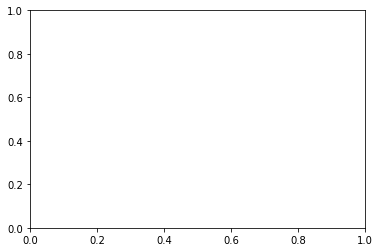

In [12]:
cv = KFold(n_splits=K)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)
classifier = MultinomialNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i))#,
                         #alpha=1)#, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

In [17]:


clf.fit(X, y)

In [17]:
corpus = df.sms.tolist()
label = df.label.tolist()

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import auc
# from sklearn.metrics import plot_roc_curve
# from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X[0])
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [12]:
X.shape

(100, 804)

In [ ]:
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [1]:
from sklearn.metrics import plot_roc_curve